# Multilayer Perceptron in Gluon

In [1]:
!pip install mxnet
!pip install d2l

     |████████████████████████████████| 25.4MB 54.8MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for d2l: filename=d2l-0.10.1-cp36-none-any.whl size=16622 sha256=eb5794a34450c15a3e1277016b394863fa6dbaa113c1996a06cf112b6a8099cc
  Stored in directory: /root/.cache/pip/wheels/60/35/5d/df7f13dd4b012de688ffcc516091c6cd67c765dc64c9d1f43f
Successfully built d2l


In [0]:
import d2l
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn
import time

## The Model

In [0]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'))
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

## Training

delta time 83.727836 sec


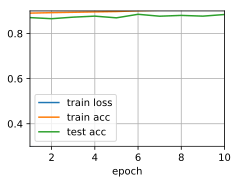

In [11]:
batch_size, num_epochs = 256, 10
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
start = time.time()
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
delta_time=time.time() - start
print('delta time %f sec' % (delta_time))

##Multilayer Perceptron in Keras

In [6]:
import keras


from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dropout

Using TensorFlow backend.


In [7]:
# grab the Fashion MNIST dataset (if this is your first time running
# this the dataset will be automatically downloaded)
print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
 
# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)
 
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]

[INFO] loading Fashion MNIST...
4423680/4422102 [==============================] - 1s 0us/step


In [8]:
width=28
height=28
depth=1
classes=10
batch_size, num_epochs = 256, 10
model = Sequential()
model.add(Flatten(input_shape=(height, width, depth)))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(10))

sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(trainX , trainY, batch_size=batch_size, epochs=num_epochs, shuffle=False)







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 8.6260 - acc: 0.1587
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 9.0338 - acc: 0.1734
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: